In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re

In [2]:
#This code to find out the trending topic on Twitter. Purpose of use for market research. 
#This satisfies the statistical data for markters, as they are the stakeholders of this project
#referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
#adjusted by changing variables names and accounts to compare statistical data of

In [3]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"

def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [4]:
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

In [5]:
# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [6]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

,User,text,Date
0,@socialmedia2day,Twitter really wants people to give Fleets a c...,Tue Jul 13 00:30:05 +0000 2021
1,@socialmedia2day,An important focus for TikTok https://t.co/2iK...,Mon Jul 12 23:30:08 +0000 2021
2,@socialmedia2day,Will this help to reduce unrealistic - and unh...,Mon Jul 12 22:30:07 +0000 2021
3,@socialmedia2day,Australia now home to the platform's fourth-la...,Mon Jul 12 21:30:08 +0000 2021
4,@socialmedia2day,This could help Clubhouse maintain engagement ...,Mon Jul 12 20:40:02 +0000 2021
...,...,...,...
995,@Twitter,"@jordyNFT check DMs bestie, we might have some...",Wed Jun 30 17:13:47 +0000 2021
996,@Twitter,@blockturk This time might be different. Check...,Wed Jun 30 17:11:47 +0000 2021
997,@Twitter,@Bosslogic You got twttr jggl https://t.co/Nhr...,Wed Jun 30 17:10:51 +0000 2021
998,@Twitter,@ElsewhatGamers You got Furry Twitter https://...,Wed Jun 30 17:09:46 +0000 2021


In [7]:
df.to_csv('tweetsentimentanalysis.csv', index=False)

In [8]:
#CH portion incorporated

In [9]:
import pandas as pd
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
print(df_saved_file.head())

# Date right now is just a string, but as we need to sort by it later, it needs to be converted into a DateTime object
# otherwise the sorting would just be alphabetical and not by time
df_saved_file['Date'] = pd.to_datetime(df_saved_file['Date'])
print(df_saved_file.head())
df_saved_file['Date'].dtype # just proof that Date is now of a special datetime type

               User                                               text  \
0  @socialmedia2day  Twitter really wants people to give Fleets a c...   
1  @socialmedia2day  An important focus for TikTok https://t.co/2iK...   
2  @socialmedia2day  Will this help to reduce unrealistic - and unh...   
3  @socialmedia2day  Australia now home to the platform's fourth-la...   
4  @socialmedia2day  This could help Clubhouse maintain engagement ...   

                             Date  
0  Tue Jul 13 00:30:05 +0000 2021  
1  Mon Jul 12 23:30:08 +0000 2021  
2  Mon Jul 12 22:30:07 +0000 2021  
3  Mon Jul 12 21:30:08 +0000 2021  
4  Mon Jul 12 20:40:02 +0000 2021  
               User                                               text  \
0  @socialmedia2day  Twitter really wants people to give Fleets a c...   
1  @socialmedia2day  An important focus for TikTok https://t.co/2iK...   
2  @socialmedia2day  Will this help to reduce unrealistic - and unh...   
3  @socialmedia2day  Australia now home to 

datetime64[ns, UTC]

In [10]:
# Quick test to see if sorting by data (new to old) works
df_saved_file.sort_values(by="Date", ascending=False).head(20)

,User,text,Date
0,@socialmedia2day,Twitter really wants people to give Fleets a c...,2021-07-13 00:30:05+00:00
1,@socialmedia2day,An important focus for TikTok https://t.co/2iK...,2021-07-12 23:30:08+00:00
2,@socialmedia2day,Will this help to reduce unrealistic - and unh...,2021-07-12 22:30:07+00:00
600,@Facebook,RT @techatfacebook: For Alexa Fischer and J.J....,2021-07-12 21:40:17+00:00
3,@socialmedia2day,Australia now home to the platform's fourth-la...,2021-07-12 21:30:08+00:00
4,@socialmedia2day,This could help Clubhouse maintain engagement ...,2021-07-12 20:40:02+00:00
5,@socialmedia2day,Facebook is gradually adjusting its ad options...,2021-07-12 19:30:12+00:00
6,@socialmedia2day,Keep your web traffic numbers up with these ti...,2021-07-12 18:30:12+00:00
7,@socialmedia2day,Ensure you're focusing in the right metrics wi...,2021-07-12 17:30:16+00:00
400,@Instagram,What pink fairy bubbly dreams are made of 🧚🏼‍♀...,2021-07-12 16:52:06+00:00


In [11]:
print(df_saved_file.head(30))

                User                                               text  \
0   @socialmedia2day  Twitter really wants people to give Fleets a c...   
1   @socialmedia2day  An important focus for TikTok https://t.co/2iK...   
2   @socialmedia2day  Will this help to reduce unrealistic - and unh...   
3   @socialmedia2day  Australia now home to the platform's fourth-la...   
4   @socialmedia2day  This could help Clubhouse maintain engagement ...   
5   @socialmedia2day  Facebook is gradually adjusting its ad options...   
6   @socialmedia2day  Keep your web traffic numbers up with these ti...   
7   @socialmedia2day  Ensure you're focusing in the right metrics wi...   
8   @socialmedia2day  Rising tweet trends of note https://t.co/Y4337...   
9   @socialmedia2day  An interesting new addition to Facebook's VR t...   
10  @socialmedia2day  Tomorrow, join us for #SMTLive Twitter chat 💬\...   
11  @socialmedia2day  @DigitalCTMind @SMExaminer @HubSpot @MariSmith...   
12  @socialmedia2day  AR 

In [12]:
# CH: I _think_ you want the top tweet for each of your 5 Users in df_saved_file with "top" being the newest tweet(?)
# My strategy would be to have your user input a list of requested users first and then process that list

In [13]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print(type(unique_users))
print(unique_users) # you can use it like a list of strings

<class 'numpy.ndarray'>
['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [14]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with")
while True:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish@socialmedia2day
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedia2day']
Enter name from valid user list or Enter to finish@Google
Invalid user, try again
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedia2day']
Enter name from valid user list or Enter to finish@Facebook
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedia2day', '@Facebook']
Enter name from valid user list or Enter to finish@Instagram
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names ['@socialmedi

In [15]:
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter']

In [16]:
# How many tweets for each user?
for n in requested_users_list:
    df_for_user = df_saved_file[df_saved_file["User"] == n]   
    print(n, "has", len(df_for_user), "tweets")

@socialmedia2day has 200 tweets
@GoogleAds has 200 tweets
@Instagram has 200 tweets
@Facebook has 200 tweets
@Twitter has 200 tweets


In [17]:
# Not needed?

tweet_list = []
# Pull out the newest tweet for a name and store in list
for n in requested_users_list:
    print("\n", n)
    df_for_user = df_saved_file[df_saved_file["User"] == n]   # isolate by user
    #print(df_for_user.head())

    df_sorted = df_for_user.sort_values(by="Date", ascending=False) # sort by date (new to old)
    df_sorted = df_sorted.reset_index(drop=True)  # make index numbers start with 0
    print(df_sorted.head())

    # pull out a dataframe with the 1 newest tweet for that user
    # I know loc[0:0] looks weird but it grabs a single row but still makes a valid dataframe from it. With loc[0], you'd get a Series instead
    # and that is more complex to make into a larger dataframe later.
    latest_tweet = df_sorted.loc[0:0]  # or loc[0:2] for the 3 newest tweets, etc.
    tweet_list.append(latest_tweet)


 @socialmedia2day
               User                                               text  \
0  @socialmedia2day  Twitter really wants people to give Fleets a c...   
1  @socialmedia2day  An important focus for TikTok https://t.co/2iK...   
2  @socialmedia2day  Will this help to reduce unrealistic - and unh...   
3  @socialmedia2day  Australia now home to the platform's fourth-la...   
4  @socialmedia2day  This could help Clubhouse maintain engagement ...   

                       Date  
0 2021-07-13 00:30:05+00:00  
1 2021-07-12 23:30:08+00:00  
2 2021-07-12 22:30:07+00:00  
3 2021-07-12 21:30:08+00:00  
4 2021-07-12 20:40:02+00:00  

 @GoogleAds
         User                                               text  \
0  @GoogleAds  RT @GoogleAdMob: Our Ads keynote is finally he...   
1  @GoogleAds  RT @googleanalytics: Deeper insights. Smarter ...   
2  @GoogleAds  Two new Google Academy topics are launching on...   
3  @GoogleAds  Check out the official guide to optimizing Dis...   
4  

In [18]:
# make a new df by glueing together the dataframes contained in the list
# this would also work if you had pull out more than the 0 newest row
df_top5tweets = pd.concat(tweet_list,   
                        axis=0, # glue together row-wise, not column wise 
                        ignore_index=True) # re-index new dataframe to start from 0
print(df_top5tweets.head())

# You seem to later call this df ....
df5 = df_top5tweets

               User                                               text  \
0  @socialmedia2day  Twitter really wants people to give Fleets a c...   
1        @GoogleAds  RT @GoogleAdMob: Our Ads keynote is finally he...   
2        @Instagram  What pink fairy bubbly dreams are made of 🧚🏼‍♀...   
3         @Facebook  RT @techatfacebook: For Alexa Fischer and J.J....   
4          @Twitter  @DBresach You got twttr jggl https://t.co/30vT...   

                       Date  
0 2021-07-13 00:30:05+00:00  
1 2021-07-12 16:50:25+00:00  
2 2021-07-12 16:52:06+00:00  
3 2021-07-12 21:40:17+00:00  
4 2021-07-12 14:48:27+00:00  


CH portion stopped

In [19]:
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
df_saved_file

,User,text,Date
0,@socialmedia2day,Twitter really wants people to give Fleets a c...,Tue Jul 13 00:30:05 +0000 2021
1,@socialmedia2day,An important focus for TikTok https://t.co/2iK...,Mon Jul 12 23:30:08 +0000 2021
2,@socialmedia2day,Will this help to reduce unrealistic - and unh...,Mon Jul 12 22:30:07 +0000 2021
3,@socialmedia2day,Australia now home to the platform's fourth-la...,Mon Jul 12 21:30:08 +0000 2021
4,@socialmedia2day,This could help Clubhouse maintain engagement ...,Mon Jul 12 20:40:02 +0000 2021
...,...,...,...
995,@Twitter,"@jordyNFT check DMs bestie, we might have some...",Wed Jun 30 17:13:47 +0000 2021
996,@Twitter,@blockturk This time might be different. Check...,Wed Jun 30 17:11:47 +0000 2021
997,@Twitter,@Bosslogic You got twttr jggl https://t.co/Nhr...,Wed Jun 30 17:10:51 +0000 2021
998,@Twitter,@ElsewhatGamers You got Furry Twitter https://...,Wed Jun 30 17:09:46 +0000 2021


In [20]:
#!pip install VaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [21]:
import pandas as pd
df = pd.read_csv('tweetsentimentanalysis.csv')
print(df.head())

               User                                               text  \
0  @socialmedia2day  Twitter really wants people to give Fleets a c...   
1  @socialmedia2day  An important focus for TikTok https://t.co/2iK...   
2  @socialmedia2day  Will this help to reduce unrealistic - and unh...   
3  @socialmedia2day  Australia now home to the platform's fourth-la...   
4  @socialmedia2day  This could help Clubhouse maintain engagement ...   

                             Date  
0  Tue Jul 13 00:30:05 +0000 2021  
1  Mon Jul 12 23:30:08 +0000 2021  
2  Mon Jul 12 22:30:07 +0000 2021  
3  Mon Jul 12 21:30:08 +0000 2021  
4  Mon Jul 12 20:40:02 +0000 2021  


In [22]:
# which users do we have in the df? Only those are valid input names.
unique_users = df_saved_file["User"].unique() # will create a numpy array with all user names in your df
print("Available users", unique_users) # you can use it like a list of strings

Available users ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']


In [23]:
requested_users_list = [] # will contains valid(!) user names that your users want's to work with later
print("Input the user names you want to work with (up to 5)")
while len(requested_users_list) < 6:
    print("Valid user names:", unique_users)
    print("Currently requested user names", requested_users_list)
    name = input("Enter name from valid user list or Enter to finish")
    if name == "": break  # enter key, quit loop
    if name not in unique_users:
        print("Invalid user, try again")
        continue

    requested_users_list.append(name)
    
print("User name selection finished:",  requested_users_list)

Input the user names you want to work with (up to 5)
Valid user names: ['@socialmedia2day' '@GoogleAds' '@Instagram' '@Facebook' '@Twitter']
Currently requested user names []
Enter name from valid user list or Enter to finish
User name selection finished: []


In [24]:
# CHEAT
requested_users_list = ['@socialmedia2day', '@GoogleAds', '@Instagram', '@Facebook', '@Twitter']

In [25]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [26]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head(20)

,User,text,Date,Compound,Positive,Negative,Neutral
0,@socialmedia2day,Twitter really wants people to give Fleets a c...,Tue Jul 13 00:30:05 +0000 2021,0.2500,0.182,0.000,0.818
1,@socialmedia2day,An important focus for TikTok https://t.co/2iK...,Mon Jul 12 23:30:08 +0000 2021,0.2023,0.265,0.000,0.735
2,@socialmedia2day,Will this help to reduce unrealistic - and unh...,Mon Jul 12 22:30:07 +0000 2021,-0.1779,0.168,0.211,0.621
3,@socialmedia2day,Australia now home to the platform's fourth-la...,Mon Jul 12 21:30:08 +0000 2021,0.0000,0.000,0.000,1.000
4,@socialmedia2day,This could help Clubhouse maintain engagement ...,Mon Jul 12 20:40:02 +0000 2021,0.6908,0.416,0.000,0.584
5,@socialmedia2day,Facebook is gradually adjusting its ad options...,Mon Jul 12 19:30:12 +0000 2021,0.0000,0.000,0.000,1.000
6,@socialmedia2day,Keep your web traffic numbers up with these ti...,Mon Jul 12 18:30:12 +0000 2021,0.0000,0.000,0.000,1.000
7,@socialmedia2day,Ensure you're focusing in the right metrics wi...,Mon Jul 12 17:30:16 +0000 2021,0.3818,0.178,0.000,0.822
8,@socialmedia2day,Rising tweet trends of note https://t.co/Y4337...,Mon Jul 12 16:30:20 +0000 2021,0.0000,0.000,0.000,1.000
9,@socialmedia2day,An interesting new addition to Facebook's VR t...,Mon Jul 12 15:30:23 +0000 2021,0.4019,0.252,0.000,0.748


In [27]:
# print out min-mean-max for each sentiment for each user

In [28]:
import re
#collects the compound positive hashtags from the tweets data
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5]) 
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'startup',
 'SmallBusinessWeek',
 'SmallBusinessWeek',
 'ecommerce',
 'GML2021',
 'GoogleIO',
 'GML2021',
 'GoogleAdsTutorials',
 'GoogleIO',
 'WomensHistoryMonth',
 'GoogleForIndia',
 'WomenWill',
 'GoogleAdsTutorials',
 'WomensHistoryMonth',
 'GooglePartners',
 'BlackHistoryMonth',
 'Web',
 'FridayFeeling',
 'NAIDOCWeek',
 'Pride',
 'ShareWithPride',
 'Pride',
 'NationalBestFriendsDay',
 'Pride',
 'Pride',
 'pride',
 'pridefamily',
 'genderfluid',
 'gayvisibility',
 'Pride',
 'Pride',
 'ShareWithPride',
 'TakeABreak',
 'MentalHealthAwarenessMonth',
 'WeeklyFluff',
 'this',
 'MothersDay',
 'MayThe4thBeWithYou',
 'TakeABreak',
 'APIHM',
 'NFLdraft',
 'NationalPetDay',
 'WeeklyFluff',
 'Pride',
 'JuneTeenth2021',
 'WorldBloodDonorDay',
 'pride',
 'pride',
 'Pride',
 'APAHM',
 'EarthDay',
 'EarthDay']

In [29]:
import numpy as np
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Facebook,0.317170
@GoogleAds,0.320595
@Instagram,0.292436
@Twitter,0.127886
@socialmedia2day,0.205765


<AxesSubplot:xlabel='User'>

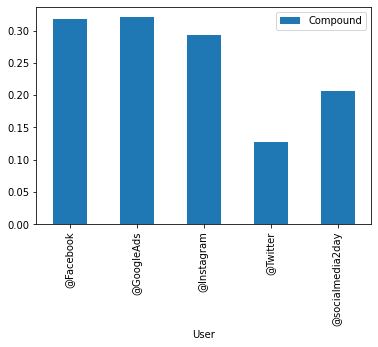

In [30]:
#plotting 
score_table.plot(kind='bar')

In [31]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
score_table

,Positive
User,
@Facebook,0.154030
@GoogleAds,0.129710
@Instagram,0.167140
@Twitter,0.095025
@socialmedia2day,0.143325


<AxesSubplot:xlabel='User'>

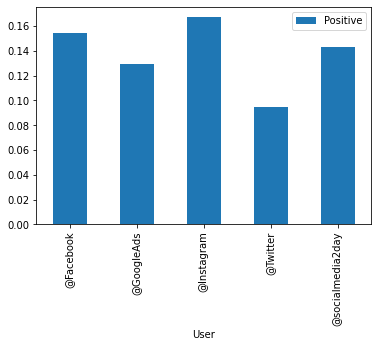

In [32]:
#Collect the negative values for each news source
pos_score_table = df.pivot_table(index='User',  values="Positive", aggfunc = np.mean)
pos_score_table
pos_score_table.plot(kind='bar')

In [33]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
score_table

,Negative
User,
@Facebook,0.026840
@GoogleAds,0.011170
@Instagram,0.051885
@Twitter,0.004685
@socialmedia2day,0.020565


<AxesSubplot:xlabel='User'>

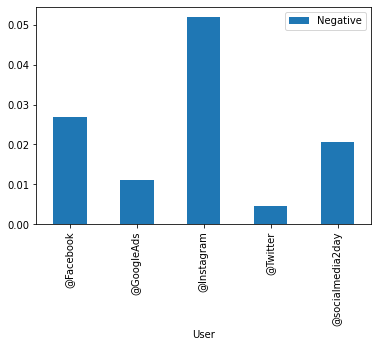

In [34]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [35]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
User,
@Facebook,0.026840
@GoogleAds,0.011170
@Instagram,0.051885
@Twitter,0.004685
@socialmedia2day,0.020565


In [62]:
from collections import Counter
import pandas as pd
a = dict(Counter(HT_positive))
t = list(a.items()) 
compound = score_table["Compound"]
df = pd.DataFrame(t, columns=["Hashtags", "Number of Occurence"])
df4 = df.append(compound)
df.to_csv('hashtags.csv', index=False)
df4_saved_file = pd.read_csv('hashtags.csv')
df4_saved_file
# df4_saved_file = df4_save_file.join(compound)
# c = ['hashtags', 'number of occurences']
# c.append('compound') 

KeyError: 'Compound'